# Predicting House Prices in Banglore

**Problem Statement:**

In India, there are multiple real estate classified websites where properties are listed for sell/buy/rent purposes such as 99acres, housing, commonfloor, magicbricks and more. However, in each of these websites we can see lot of inconsistencies in terms of pricing of an apartment and there are some cases when similar apartments are priced differently and thus there is lot of in-transparency. Sometimes the consumers may feel the pricing is not justified for a particular listed apartment but there no way to confirm that either. Proper and justified prices of properties can bring in a lot of transparency and trust back to the real estate industry, which is very important as for most consumers especially in India the transaction prices are quite high and addressing this issue will help both the customers and the real estate industry in the long run. I propose to use machine learning techniques to develop an algorithm that can predict housing prices based on certain input features. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
%matplotlib inline
import matplotlib

#### Load "bengaluru_house_prices.csv" into a dataframe

In [2]:
df = pd.read_csv("E:\Dataset\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### Data cleaning process

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df1 = df.drop(['area_type','availability','society','balcony'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Feature Engineering:
**Add new feature(int) for bhk**

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

C:\Users\Pradip\AppData\Local\Temp\ipykernel_14660\4139367605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [9]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple**

In [12]:
def sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    
    try:
        return float(x)
    except:
        return None

In [13]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_num)
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk


#### Add new feature called price per square feet

In [14]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [15]:
df4.location.unique()
len(df4.location.unique())

1304

In [16]:
df4.location = df4.location.apply(lambda x: x.strip())
loc_stat = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [17]:
len(loc_stat[loc_stat<=10])

1052

**Dimensionality Reduction:**

- Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [18]:
loc_less_10 = loc_stat[loc_stat<=10]
loc_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [19]:
len(df4.location.unique())

1293

In [20]:
df4.location = df4.location.apply(lambda x: 'other' if x in loc_less_10 else x)
len(df4.location.unique())

242

In [21]:
df5 = df4.drop(['size'],axis='columns')
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [22]:
(df5[df5.total_sqft/df5.bhk<300]).head() # Removing outliers for example 6 bhk 1020 sqft

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [23]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [24]:
(df6[df6.total_sqft/df5.bhk<300]).head()

C:\Users\Pradip\AppData\Local\Temp\ipykernel_14660\3816488463.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df6[df6.total_sqft/df5.bhk<300]).head()


,location,total_sqft,bath,price,bhk,price_per_sqft


#### Outlier Removal Using Standard Deviation and Mean

In [25]:
df6.price_per_sqft.describe() # Minimum and maximum price per sqft is unexpected

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [26]:
def remove_prise_otls(df):
    df_out = pd.DataFrame()
    for key, x in df.groupby('location'):
        m = np.mean(x.price_per_sqft)
        std = np.std(x.price_per_sqft)
        reduced_df = x[(x.price_per_sqft>(m-std)) & (x.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [27]:
df7 = remove_prise_otls(df6)
df7.shape

(10241, 6)

In [28]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    pl.scatter(bhk2.total_sqft,bhk2.price, marker='^', color='blue', label='2 BHK', s=50)
    pl.scatter(bhk3.total_sqft,bhk3.price, marker='o', color='red', label='3 BHK', s=50)
    pl.xlabel("Total Square Feet Area")
    pl.ylabel("Price (Lakh INR)")
    pl.title(location)
    pl.legend()

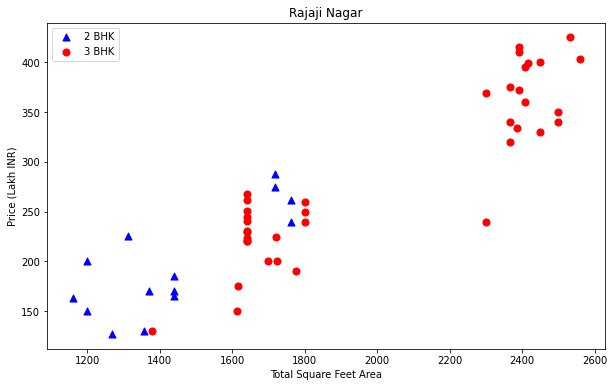

In [29]:
plot_scatter_chart(df7,"Rajaji Nagar")

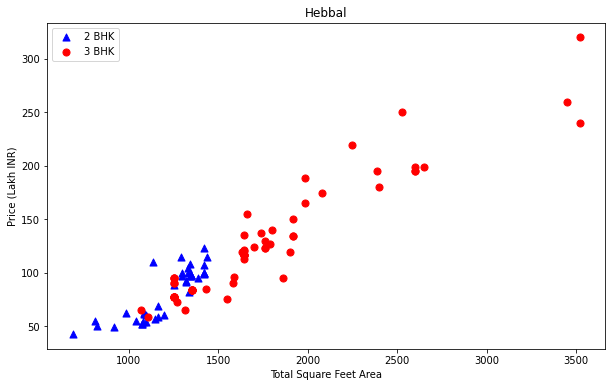

In [30]:
plot_scatter_chart(df7,'Hebbal')

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
 {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
 }
```
- Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [32]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 6)

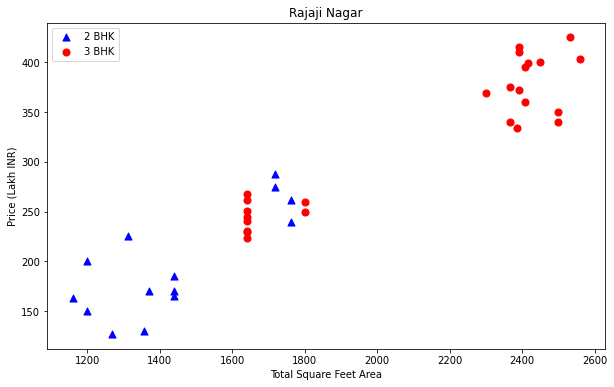

In [33]:
plot_scatter_chart(df8,"Rajaji Nagar")

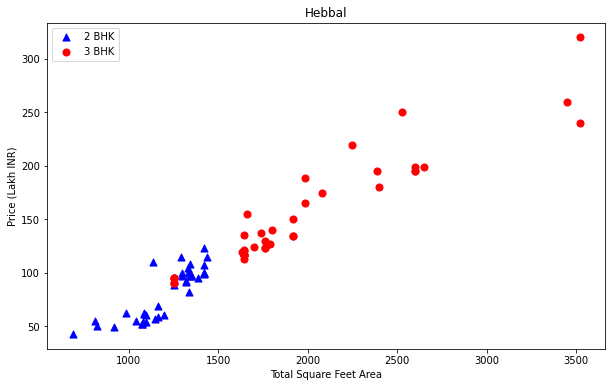

In [34]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

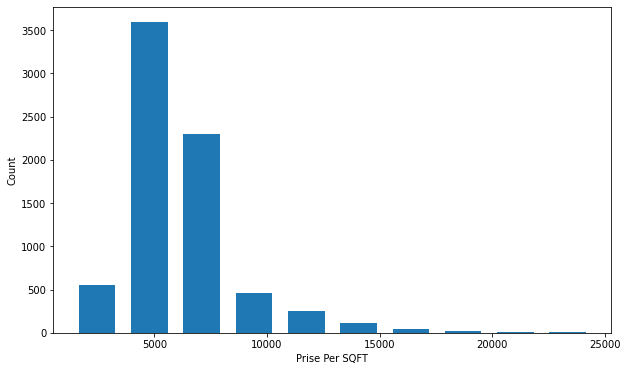

In [35]:
matplotlib.rcParams["figure.figsize"] = (10,6)
pl.hist(df8.price_per_sqft, rwidth=0.7)
pl.xlabel('Prise Per SQFT')
pl.ylabel('Count')

In [36]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [37]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

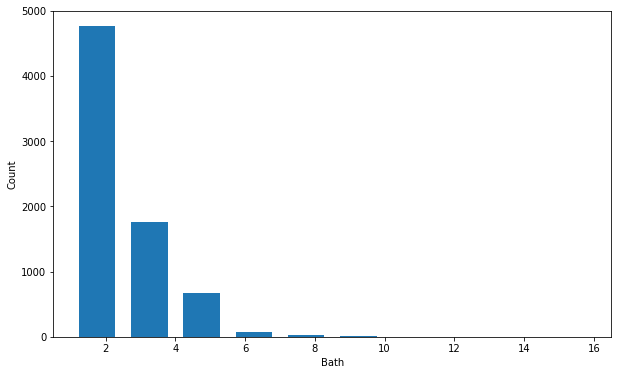

In [38]:
pl.hist(df8.bath, rwidth=0.7)
pl.xlabel('Bath')
pl.ylabel('Count')

In [39]:
df8[df8.bath>df8.bhk+1]

,location,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
530,Arekere,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...
9915,other,6652.0,6.0,510.0,4,7666.867108
10036,other,600.0,4.0,70.0,2,11666.666667
10089,other,5656.0,5.0,499.0,3,8822.489392
10202,other,6652.0,6.0,660.0,4,9921.828022


In [40]:
df9 = df8[(df8.bath<df8.bhk+2)] # Removig datas for which number of bathroom is greater then number of bedroom
df9.shape

(7251, 6)

In [41]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


#### One-hot Encoding for location

In [42]:
dummies = pd.get_dummies(df10.location) 
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df11 = pd.concat((df10,dummies.drop('other',axis='columns')),axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df12 = df11.drop('location', axis='columns')
df12.shape

(7251, 245)

#### Split dataset into train and test

In [45]:
X = df12.drop('price', axis='columns')
y = df12.price

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [47]:
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape: ', y_test.shape)

Training Features Shape:  (5800, 244)
Training Labels Shape:  (5800,)
Testing Features Shape:  (1451, 244)
Testing Labels Shape:  (1451,)


#### Find best model using GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'SVR' : {
            'model': SVR(),
            'params': {
                'kernel': ['poly', 'rbf', 'sigmoid']
            }
        },
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2,3],
                'selection': ['random', 'cyclic']
            }
        },
        'random_forest': {
                'model': RandomForestRegressor(),
                'params': {
                    'n_estimators' : [50, 100, 200]
            }
        },
        'ada_boost': {
                'model': AdaBoostRegressor(),
                'params': {
                    'n_estimators' : [50, 100],
                    'learning_rate' : [.001, 0.2, 0.5, 1.0],
                    'random_state' : [20, 30]
            }
        },
        'gradient_boost': {
                'model': GradientBoostingRegressor(),
                'params': {
                    'n_estimators' : [300, 400],
                    'criterion' : ['squared_error', 'friedman_mse'],
                    'learning_rate' : [0.2, 0.5, 1.0]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        print(algo_name,'=', config)
        start_time = datetime.now()
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        end_time = datetime.now()
        print('Time efficiency: ',end_time - start_time)
        print()
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [50]:
find_best_model_using_gridsearchcv(X,y)

SVR = {'model': SVR(), 'params': {'kernel': ['poly', 'rbf', 'sigmoid']}}
Time efficiency:  0:02:59.560282

linear_regression = {'model': LinearRegression(), 'params': {'fit_intercept': [True, False], 'positive': [True, False]}}
Time efficiency:  0:00:07.081888

lasso = {'model': Lasso(), 'params': {'alpha': [1, 2, 3], 'selection': ['random', 'cyclic']}}
Time efficiency:  0:00:03.148721

random_forest = {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200]}}
Time efficiency:  0:04:50.492453

ada_boost = {'model': AdaBoostRegressor(), 'params': {'n_estimators': [50, 100], 'learning_rate': [0.001, 0.2, 0.5, 1.0], 'random_state': [20, 30]}}
Time efficiency:  0:06:11.099336

gradient_boost = {'model': GradientBoostingRegressor(), 'params': {'n_estimators': [300, 400], 'criterion': ['squared_error', 'friedman_mse'], 'learning_rate': [0.2, 0.5, 1.0]}}
Time efficiency:  0:10:47.137655



,model,best_score,best_params
0,SVR,0.558579,{'kernel': 'rbf'}
1,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
2,lasso,0.688547,"{'alpha': 3, 'selection': 'random'}"
3,random_forest,0.780231,{'n_estimators': 200}
4,ada_boost,0.695675,"{'learning_rate': 0.001, 'n_estimators': 50, '..."
5,gradient_boost,0.836222,"{'criterion': 'squared_error', 'learning_rate'..."


**Based on above results we can say that Gradient Boosting gives the best score. Hence we will use that.**

#### Build Gradient Boosting model

In [51]:
model = GradientBoostingRegressor(n_estimators=400, learning_rate=0.6, criterion='squared_error')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9142244500022729

#### Use K Fold cross validation to measure accuracy of GradientBoostingRegressor model

In [52]:
k_fold = 10
cv = ShuffleSplit(n_splits=k_fold, test_size=0.2, random_state=0)

cv_score = cross_val_score(GradientBoostingRegressor(n_estimators=400, learning_rate=0.6, criterion='squared_error'), X, y, cv=cv)
print(cv_score)
print('\nAverage score of', k_fold, 'Fold Cross Validation:',format(np.average(cv_score),'.4f'))

[0.87446242 0.71527926 0.89246175 0.83610619 0.88440202 0.6978544
 0.85109924 0.88034054 0.66235001 0.8877589 ]

Average score of 10 Fold Cross Validation: 0.8182


In [53]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5), ):
    
    if axes is None:
        _, axes = pl.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return pl

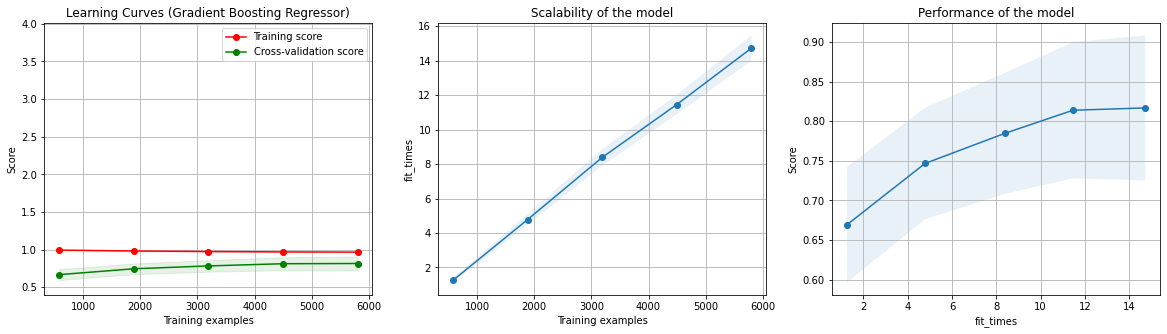

In [54]:
X, y = df12.drop('price', axis='columns'), df12.price

title = r"Learning Curves (Gradient Boosting Regressor)"
plot_learning_curve(model, title, X, y,  ylim=(.4, 4.01), cv=cv, n_jobs=4)

pl.show()

#### $R^2$ and Adjusted $R^2$ value

In [55]:
def RSS(X_test,y_test):
    y_test_hat = model.predict(X_test)
    return ((y_test_hat - y_test)**2).sum()

def TSS(y_test):
    y_mean = np.full(y_test.shape, y_test.mean())
    return ((y_mean - y_test)**2).sum()

def R2(X_test,y_test):
    return 1-RSS(X_test,y_test)/TSS(y_test)

def adj_R2(X_test,y_test):
    return 1 - ((RSS(X_test,y_test)*(len(y)-1))/(TSS(y_test)*(len(y)-X.shape[1]-1)))

In [56]:
print('R2 on test set:', R2(X_test,y_test),'\nAdjusted R2 on test set: ', adj_R2(X_test,y_test))

R2 on test set: 0.9142244500022729 
Adjusted R2 on test set:  0.9112371199709505


#### Test the model for few properties

In [57]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [58]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return print('Predictd price in',location, 'with', bhk, 'bhk,',bath, 'bathroom and', sqft, 'sqft is:',
                 float(format(model.predict([x])[0], '.4f')))

In [59]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

Predictd price in 1st Phase JP Nagar with 2 bhk, 2 bathroom and 1000 sqft is: 75.9734


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [60]:
predict_price('1st Phase JP Nagar',1000, 1, 2)

Predictd price in 1st Phase JP Nagar with 2 bhk, 1 bathroom and 1000 sqft is: 77.8013


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


#### Export the tested model to a pickle file

In [61]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model, f)

#### Export location and column information to a file that will be useful later on in our prediction application

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))